In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("./eda_data.csv")
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,same_state,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,0,1,0,0,0,1,data scientist,na,2555,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,0,1,0,0,0,0,data scientist,na,4828,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,1,1,0,1,0,1,data scientist,na,3495,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,1,1,0,0,0,0,data scientist,na,3926,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,1,1,0,0,0,1,data scientist,na,2748,3


In [3]:
# chose  relevent columns
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'python_yn', 'R_yn', 'spark',
       'aws', 'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [4]:
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer_provided',
             'job_state','same_state','python_yn','spark','aws','excel','job_simp','seniority','desc_len']]


In [5]:
# get dummy data  ,# Apply pd.get_dummies() to create new DataFrame with binary columns
df_dum = pd.get_dummies(df_model)

In [6]:
df_dum.head()

,avg_salary,Rating,num_comp,hourly,employer_provided,same_state,python_yn,spark,aws,excel,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,87.5,3.4,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,85.0,4.8,0,0,0,1,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
3,76.5,3.8,3,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,114.5,2.9,3,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [7]:
# train test split 
from sklearn.model_selection import train_test_split

X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

#By setting random_state to a fixed value, you ensure that the same random split is produced every time you run the code.
#The specific value of 42 used for random_state is arbitrary and has no special significance. It could be any integer value, as long as it is consistent across different runs of the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


multiple linear regression 

In [8]:
# statsmodels library, which provides a wide range of statistical models and tools for data analysis.
import statsmodels.api as sm

# This line adds a constant column to the feature data in X using the sm.add_constant() function from the statsmodels library. This is necessary for certain types of regression models, such as ordinary least squares (OLS), which require a constant term.
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     10.18
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           7.38e-94
Time:                        11:05:12   Log-Likelihood:                -3317.0
No. Observations:                 742   AIC:                             6916.
Df Residuals:                     601   BIC:                             7566.
Df Model:                         140                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                50.5787      6.321      8.002      0.000      38.165      62.993
Rating                                                2.5900      1.895      1.367      0.172      -1.131       6.311
num_comp                                              2.2517      0.868      2.595      0.010       0.548       3.956
hourly                                              -37.7631      9.197     -4.106      0.000     -55.825     -19.701
employer_provided                                 -4.231e-10   9.87e-11     -4.284      0.000   -6.17e-10   -2.29e-10
same_state                                            1.9926      2.626      0.759      0.448      -3.164       7.149
python_yn                                             7.5873      2.531      2.998      0.003       2.617      12.557
spark                                                -0.9189      2.933     -0.313      0.754      -6.678       4.841
aws                                                   1.9765      2.735      0.723      0.470      -3.395       7.348
excel                                                 0.3633      2.264      0.160      0.873      -4.083       4.810
desc_len                                             -0.0003      0.001     -0.399      0.690      -0.002       0.001
Size_-1                                              19.7454      8.341      2.367      0.018       3.363      36.127
Size_1 to 50 employees                               -1.6740      6.457     -0.259      0.796     -14.355      11.007
Size_10000+ employees                                -6.0907      5.694     -1.070      0.285     -17.273       5.092
Size_1001 to 5000 employees                           3.5928      3.739      0.961      0.337      -3.750      10.935
Size_201 to 500 employees                            -0.2259      3.799     -0.059      0.953      -7.688       7.236
Size_5001 to 10000 employees                         -5.8335      5.232     -1.115      0.265     -16.109       4.442
Size_501 to 1000 employees                           -0.5827      3.963     -0.147      0.883      -8.365       7.200
Size_51 to 200 employees                              3.1621      4.432      0.714      0.476      -5.542      11.866
Size_Unknown                                         38.4852     12.399      3.104      0.002      14.135      62.835
Type of ownership_-1                                 19.7454      8.341      2.367      0.018       3.363      36.127
Type of ownership_College / University                8.2662     17.798      0.464      0.642     -26.687      43.219
Type of ownership_Company - Private                   7.7863      5.261      1.480      0.139      -2.547      18.119
Type of ownersh

In [9]:

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))


-7657257.647141763

lasso regression 

In [10]:
# Lasso (Least Absolute Shrinkage and Selection Operator) is a type of linear regression model that uses regularization to prevent overfitting and improve model performance
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))


-19.467603841216974

,alpha,error
21,0.22,-19.450596


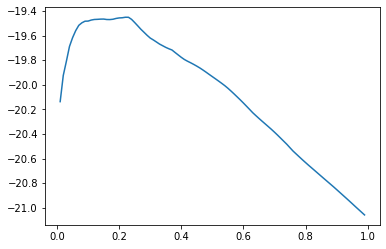

In [11]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

random forest 

In [12]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))


-15.006281854073732

tune models GridsearchCV 

In [13]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_


c:\Users\jebalia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\jebalia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\jebalia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\jebalia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py

RandomForestRegressor(criterion='mse', max_features='auto', n_estimators=110)

 test ensembles 

In [14]:
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)


from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)
mean_absolute_error(y_test,tpred_lml)
mean_absolute_error(y_test,tpred_rf)

mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

list(X_test.iloc[1,:])

c:\Users\jebalia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[3.6,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 4644.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 